<a href="https://colab.research.google.com/github/PravalikaBojja/PortAndSailCalculation/blob/main/PortAndSailCalculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from math import radians, sin, cos, sqrt, atan2

In [ ]:
# Load data
data = {
    'id': [1, 2, 3, 4],
    'event': ['SOSP', 'EOSP', 'SOSP', 'EOSP'],
    'dateStamp': [43831, 43831, 43832, 43832],
    'timeStamp': [0.708333, 0.791667, 0.333333, 0.583333],
    'voyage_From': ['Port A', 'Port A', 'Port B', 'Port B'],
    'lat': [34.0522, 34.0522, 36.7783, 36.7783],
    'lon': [-118.2437, -118.2437, -119.4179, -119.4179],
    'imo_num': ['9434761', '9434761', '9434761', '9434761'],
    'voyage_Id': ['6', '6', '6', '6'],
    'allocatedVoyageId': [None, None, None, None]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
print(df.head())

   id event  dateStamp  timeStamp voyage_From      lat       lon  imo_num  \
0   1  SOSP      43831   0.708333      Port A  34.0522 -118.2437  9434761   
1   2  EOSP      43831   0.791667      Port A  34.0522 -118.2437  9434761   
2   3  SOSP      43832   0.333333      Port B  36.7783 -119.4179  9434761   
3   4  EOSP      43832   0.583333      Port B  36.7783 -119.4179  9434761   

  voyage_Id allocatedVoyageId  
0         6              None  
1         6              None  
2         6              None  
3         6              None  


In [ ]:
print(df)

   id event  dateStamp  timeStamp voyage_From      lat       lon  imo_num  \
0   1  SOSP      43831   0.708333      Port A  34.0522 -118.2437  9434761   
1   2  EOSP      43831   0.791667      Port A  34.0522 -118.2437  9434761   
2   3  SOSP      43832   0.333333      Port B  36.7783 -119.4179  9434761   
3   4  EOSP      43832   0.583333      Port B  36.7783 -119.4179  9434761   

  voyage_Id allocatedVoyageId  
0         6              None  
1         6              None  
2         6              None  
3         6              None  


In [ ]:
# Convert to datetime
df['utc_time'] = pd.to_datetime(df['dateStamp'] - 2) + pd.to_timedelta(df['timeStamp'], unit='D')

In [ ]:
print(df)

   id event  dateStamp  timeStamp voyage_From      lat       lon  imo_num  \
0   1  SOSP      43831   0.708333      Port A  34.0522 -118.2437  9434761   
1   2  EOSP      43831   0.791667      Port A  34.0522 -118.2437  9434761   
2   3  SOSP      43832   0.333333      Port B  36.7783 -119.4179  9434761   
3   4  EOSP      43832   0.583333      Port B  36.7783 -119.4179  9434761   

  voyage_Id allocatedVoyageId                      utc_time  
0         6              None 1970-01-01 16:59:59.971243829  
1         6              None 1970-01-01 19:00:00.028843829  
2         6              None 1970-01-01 07:59:59.971243830  
3         6              None 1970-01-01 13:59:59.971243830  


In [ ]:
# Calculate next time
df['next_utc_time'] = df['utc_time'].shift(-1)
df['next_lat'] = df['lat'].shift(-1)
df['next_lon'] = df['lon'].shift(-1)

In [ ]:
print(df)

   id event  dateStamp  timeStamp voyage_From      lat       lon  imo_num  \
0   1  SOSP      43831   0.708333      Port A  34.0522 -118.2437  9434761   
1   2  EOSP      43831   0.791667      Port A  34.0522 -118.2437  9434761   
2   3  SOSP      43832   0.333333      Port B  36.7783 -119.4179  9434761   
3   4  EOSP      43832   0.583333      Port B  36.7783 -119.4179  9434761   

  voyage_Id allocatedVoyageId                      utc_time  \
0         6              None 1970-01-01 16:59:59.971243829   
1         6              None 1970-01-01 19:00:00.028843829   
2         6              None 1970-01-01 07:59:59.971243830   
3         6              None 1970-01-01 13:59:59.971243830   

                  next_utc_time  next_lat  next_lon  
0 1970-01-01 19:00:00.028843829   34.0522 -118.2437  
1 1970-01-01 07:59:59.971243830   36.7783 -119.4179  
2 1970-01-01 13:59:59.971243830   36.7783 -119.4179  
3                           NaT       NaN       NaN  


In [ ]:
# Calculate time difference in minutes
df['duration_minutes'] = (df['next_utc_time'] - df['utc_time']).dt.total_seconds() / 60

In [ ]:
# Calculate distance
df['distance_km'] = df.apply(lambda row: haversine(row['lat'], row['lon'], row['next_lat'], row['next_lon']), axis=1)

In [ ]:
print(df)

   id event  dateStamp  timeStamp voyage_From      lat       lon  imo_num  \
0   1  SOSP      43831   0.708333      Port A  34.0522 -118.2437  9434761   
1   2  EOSP      43831   0.791667      Port A  34.0522 -118.2437  9434761   
2   3  SOSP      43832   0.333333      Port B  36.7783 -119.4179  9434761   
3   4  EOSP      43832   0.583333      Port B  36.7783 -119.4179  9434761   

  voyage_Id allocatedVoyageId                      utc_time  \
0         6              None 1970-01-01 16:59:59.971243829   
1         6              None 1970-01-01 19:00:00.028843829   
2         6              None 1970-01-01 07:59:59.971243830   
3         6              None 1970-01-01 13:59:59.971243830   

                  next_utc_time  next_lat  next_lon  duration_minutes  \
0 1970-01-01 19:00:00.028843829   34.0522 -118.2437         120.00096   
1 1970-01-01 07:59:59.971243830   36.7783 -119.4179        -660.00096   
2 1970-01-01 13:59:59.971243830   36.7783 -119.4179         360.00000   
3     

In [ ]:
# Drop the last row (NaNs due to shift)
df = df.dropna(subset=['next_utc_time'])

In [ ]:
print(df)

   id event  dateStamp  timeStamp voyage_From      lat       lon  imo_num  \
0   1  SOSP      43831   0.708333      Port A  34.0522 -118.2437  9434761   
1   2  EOSP      43831   0.791667      Port A  34.0522 -118.2437  9434761   
2   3  SOSP      43832   0.333333      Port B  36.7783 -119.4179  9434761   

  voyage_Id allocatedVoyageId                      utc_time  \
0         6              None 1970-01-01 16:59:59.971243829   
1         6              None 1970-01-01 19:00:00.028843829   
2         6              None 1970-01-01 07:59:59.971243830   

                  next_utc_time  next_lat  next_lon  duration_minutes  \
0 1970-01-01 19:00:00.028843829   34.0522 -118.2437         120.00096   
1 1970-01-01 07:59:59.971243830   36.7783 -119.4179        -660.00096   
2 1970-01-01 13:59:59.971243830   36.7783 -119.4179         360.00000   

   distance_km  
0     0.000000  
1   321.253546  
2     0.000000  


In [ ]:
print(df[['id', 'event', 'utc_time', 'duration_minutes', 'distance_km']])

   id event                      utc_time  duration_minutes  distance_km
0   1  SOSP 1970-01-01 16:59:59.971243829         120.00096     0.000000
1   2  EOSP 1970-01-01 19:00:00.028843829        -660.00096   321.253546
2   3  SOSP 1970-01-01 07:59:59.971243830         360.00000     0.000000


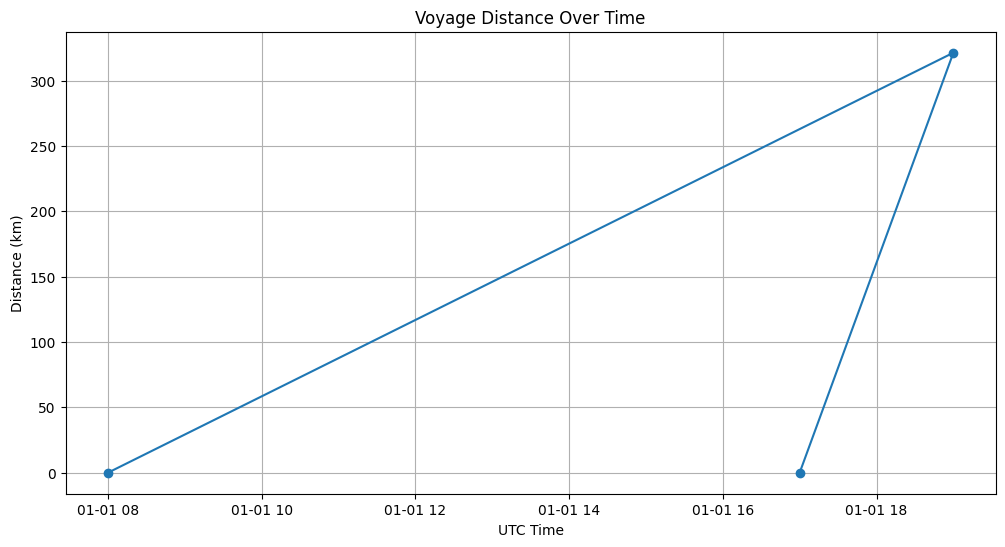

In [ ]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['utc_time'], df['distance_km'], marker='o')
plt.title('Voyage Distance Over Time')
plt.xlabel('UTC Time')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.show()